In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

# 2021/02/22

- 모델을 훈련할 때 검증(Validation) 데이터셋을 사용할 경우 `model.fit` 메서드를 사용할 때 `validation_split` 옵션을 주면 된다.
- 또는 사이킷런의 `train_test_split`을 이용하는 방법도 있다.
- `train_test_split`은 전체 데이터셋을 훈련 데이터셋과 테스트 데이터셋을 나누기 위해 사용하는 함수이지만, 
훈련 데이터셋에서 원하는 비율만큼 검증 데이터셋을 나눌 때에도 동일하게 사용할 수 있다.
- `train_test_split`을 이용하여 훈련 데이터셋과 검증 데이터셋을 미리 나눈 경우 `model.fit` 메서드에서 
`validation_data` 옵션을 통해 검증 데이터셋을 입력하면 된다.
- 검증 데이터셋을 사용할 경우 `history`에 훈련 데이터셋에 대한 평가 지표와 더불어 검증 데이터셋에 대한 평가 지표 또한 입력된다.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

# history = model.fit(X_train, y_train, validation_split=0.2)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val))
print(history.history.keys())

#### Load the data

In [9]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [10]:
# Save the input and target variables
# print(diabetes_dataset.keys())
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [11]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [12]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [34]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)), 
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

model = get_model()

In [35]:
# Print the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                

In [36]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [37]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, 
                    validation_split=0.15, batch_size=64, verbose=False)

In [38]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.7901 - mae: 0.7256


[0.8539056102434794, 0.72564316]

#### Plot the learning curves

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

- 아래의 그래프를 보면 훈련 데이터셋에 대해서는 loss가 감소하지만, 검증 데이터셋에 대해서는 loss가
증가하는 것을 알 수 있다.
- 이는 모델이 훈련 데이터셋에 대해 과대적합(overfitting)되었기 때문에 발생하는 양상이다.
- 과대적합을 방지하기 위해서는 모델의 구조를 변경하거나, 모델에 규제를 가하여 모델의 capacity를 줄이는 방법을
사용하여야 한다.

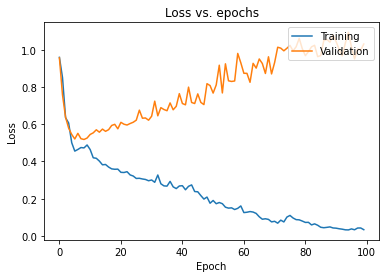

In [41]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# 2021/02/23

- 모델의 가중치 및 편향에 l1, l2 규제 혹은 둘 다를 적용하기 위해서는 아래와 같이 모델의 은닉층을 선언할 때
옵션을 주면 된다.
- 일반적으로 가중치에만 규제를 적용하지만, 편향에도 마찬가지로 동일한 규제를 적용할 수 있다.
- 이렇게 규제 옵션을 주면, loss를 계산할 때 규제항이 자동으로 추가되어 계산된다.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu',
#     kernel_regularizer=tf.keras.regularizers.l2(0.001),
#     kernel_regularizer=tf.keras.regularizers.l1(0.001),
    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.005, l2=0.001),
    bias_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(1, activation='sigmoid') # binary classification
])

model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])
model.fit(inputs, targets, validation_split=0.25)

- 모델에 dropout을 적용할 때에는 아래와 같이 Dropout 층을 사용하면 된다.
- Dropout은 모델을 훈련시킬 때에만 적용하여 은닉층의 연결을 끊기 때문에 모델을 테스트하거나 모델을 통해 
예측값을 낼 때에는 dropout을 적용하지 않고 은닉층을 모두 연결시켜 사용하게 된다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])
model.fit(inputs, targets, validation_split=0.25) # Training mode, with dropout
model.evaluate(val_inputs, val_targets)           # Testing mode, no dropout
model.predict(test_inputs)                        # testing mode, no dropout

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

In [15]:
def get_regularised_model(wd, rate): # wd: weight decay coefficient, rate: dropout rate
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [16]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5, 0.3)

In [17]:
# Compile the model
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

In [18]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, 
                    validation_split=0.15, batch_size=64, verbose=False)

In [19]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.4042 - mae: 0.5680


[0.4825334966182709, 0.568016]

#### Plot the learning curves

- 아래의 학습 곡선과 기존의 학습 곡선을 비교해 보면, l2 규제와 Dropout을 적용하였을 때 확연하게 검증 데이터셋에
대한 loss가 감소한 것을 알 수 있다.

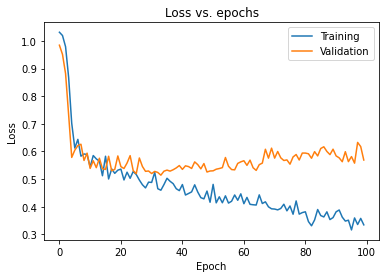

In [21]:
# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Batch normalisation layers

- 배치 정규화(Batch nomalisation)을 적용하는 방법에 대해 알아본다.

In [22]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [31]:
# Load the dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()

# Save the input and target variables
from sklearn.model_selection import train_test_split

data = diabetes_dataset['data']
targets = diabetes_dataset['target']

# Normalise the target data(this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()

# Split the dataset into training and test datasets
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

### Batch normalisation - Defining the model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

# Build the model
model = Sequential([
    Dense(64, input_shape=[train_data.shape[1],], activation='relu'),
    BatchNormalization(),  # <- Batch normalisation layer
    Dropout(0.5),
    BatchNormalization(),  # <- Batch normalisation layer
    Dropout(0.5),
    Dense(256, activation='relu'),
])
# NB: We have not added the output layer because we still have more layers to add!

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                704       
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               16640     
Total params: 17,856
Trainable params: 17,600
Non-trainable params: 256
________________________________________________

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [ ]:
# Write a custom callback



In [ ]:
# Re-build the model



In [ ]:
# Compile the model



#### Train the model with the callback

In [ ]:
# Train the model, with some of the data reserved for validation



In [ ]:
# Evaluate the model



In [ ]:
# Make predictions with the model



***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [ ]:
# Re-train the unregularised model



In [ ]:
# Evaluate the model on the test set



In [ ]:
# Re-train the regularised model



In [ ]:
# Evaluate the model on the test set



#### Plot the learning curves

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()